# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 -  There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed
 down in the recent past, the pre-owned car market has continued to grow over the past few years
 and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find
 footholes in this market.
 In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand
 cars were bought and sold. There is a slowdown in new car sales and that could mean that the
 demand is shifting towards the pre-owned market. In fact, some car owners replace their old
 vehicles with pre-owned cars instead of buying a new automobile.
 Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original
 Equipment Manufacturer / except for dealership level discounts which come into play only in the last
 stage of the customer journey), the used car market is a very different beast, with large uncertainties
 in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence
 the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct
 price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important
 in order to grow in the market.

### **The objective:**

 - We are going to develop a model that can predict the price of used cars. Additionally, we want a model that is interpretable and helps companies devise business strategies.

### **The key questions:**

- What are the main features that determine the value of a used car?

### **The problem formulation**:

- What are the weights of features that give us the best fit of a prediction curve for used car data?

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Let us load the data**

In [2]:
# read the data

path = '/content/drive/MyDrive/Colab Notebooks/used_cars.csv'
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## Data Overview

In [3]:
#shape of the dataset
df.shape

(7253, 14)

In [4]:
#get broad info about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


##Observations


*   There are 9 numerical features, including the target feature price, and 5 categorical features.
*   Several features have missing values. Some have relatively few and we will impute values. Some columns have a larger issue we will have to address.



In [5]:
#check for missing values
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


New price is missing so many values it is unhelpful to keep. We will drop it.

In [6]:
#drop New_price
df.drop('New_price', axis=1, inplace=True)

Data points where our target variable 'Price' is blank aren't helpful for training our model. We will drop these.

In [7]:
#drop entries with missing Price values
df.dropna(subset=['Price'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 658.3+ KB


We will use SimpleImputer to impute the remaining missing values, as they are all numerical.

In [9]:
#impute missing variables using SimpleImputer
from sklearn.impute import SimpleImputer
#impute missing variables on numeric columns
imputer_num = SimpleImputer(strategy='median')
for col in ['Mileage', 'Engine', 'Power', 'Seats']:
  df[col] = imputer_num.fit_transform(df[[col]])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 658.3+ KB


In [11]:
#check for duplicates
df.duplicated().sum()

0

We can now see there are no missing or duplicated values in our data set. Finally we will drop Serial Number, as it will not add anything to our analysis or model prediction.

In [12]:
#drop S.No
df.drop('S.No.', axis=1, inplace=True)

## **Exploratory Data Analysis**

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6019.0,18.134966,4.581528,0.00,15.17,18.15,21.10,33.54
Engine,6019.0,1620.509221,599.635458,72.00,1198.00,1493.00,1969.00,5998.00
Power,6019.0,112.883539,53.283701,34.20,78.00,97.70,138.03,560.00
Seats,6019.0,5.277621,0.803479,2.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


In [14]:
#list top 5 kilometers_Driven
df.sort_values(by='Kilometers_Driven', ascending=False).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,7.5
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,5.9
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.9,5.0,2.7
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.3,5.0,5.0


### Observation:
We can see there is one entry with 6.5 million km driven. This must be an error and we will drop this entry.

In [15]:
#drop unrealistic highest value
df.drop(df[df['Kilometers_Driven'] > 1000000].index, inplace=True)

In [16]:
#list top 5 kilometers_Driven
df.sort_values(by='Kilometers_Driven', ascending=False).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,7.5
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.9
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,2.7
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,5.0
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,13.0


Everything now seems reasonable.

### **Feature Engineering**

Looking at the Name column, we can see many unique names.

In [17]:
#number of unique entries in Name column
df['Name'].nunique()

1876

We can see we have 1876 unique entries in the name column which is way too many.

In [18]:
#list of names to find patterns
df['Name'].unique()[:20]

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', 'Maruti Ertiga VDI',
       'Audi A4 New 2.0 TDI Multitronic',
       'Hyundai EON LPG Era Plus Option', 'Nissan Micra Diesel XV',
       'Toyota Innova Crysta 2.8 GX AT 8S',
       'Volkswagen Vento Diesel Comfortline',
       'Tata Indica Vista Quadrajet LS', 'Maruti Ciaz Zeta',
       'Honda City 1.5 V AT Sunroof', 'Maruti Swift VDI BSIV',
       'Land Rover Range Rover 2.2L Pure',
       'Land Rover Freelander 2 TD4 SE', 'Mitsubishi Pajero Sport 4X4',
       'Honda Amaze S i-Dtech', 'Maruti Swift DDiS VDI',
       'Renault Duster 85PS Diesel RxL Plus',
       'Mercedes-Benz New C-Class C 220 CDI BE Avantgare'], dtype=object)

Upon looking at our entries in the name column, we notice that each name starts with the make of the car. If we create a new column for the make, we should have a more workable set for our model.

In [19]:
#Creating Make column from first word of Name
df['Make'] = df['Name'].str.split().str.get(0)

df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai


In [20]:
df['Make'].nunique()

31

In [21]:
#drop Name column
df.drop('Name', axis=1, inplace=True)

We created a Make column that reduced the Name column into a much more reasonable number of unique entries, and then dropped the Name column.

## **Univariate Analysis**

In [22]:
def hist_box(data, feature, figsize = (12, 7), kde = False, bins = None):

  """
  Boxplot and histogram combined

  data: dataframe
  feature: dataframe column
  figsize: size of the figure to plot
  kde: whether to show the density curve (default False)
  bins: number of bins for histogram (default None)
  """
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows = 2,      # Number of rows of the subplot grid = 2
      sharex = True,  # x-axis will be shared among all subplots
      gridspec_kw = {"height_ratios": (0.25, 0.75)},
      figsize = figsize,
  )                   # Creating the 2 subplots
  sns.boxplot(
      data = data, x = feature, ax = ax_box2, showmeans = True, color = "sandybrown"
                      )                    # Boxplot will be created and a star will indicate the mean value of the column
  sns.histplot(
      data = data,
      x = feature,
      kde = kde,
      ax = ax_hist2,
      bins = bins,    # Number of bins to be used to create the histogram
      palette = 'winter',
  ) if bins else sns.histplot(
      data = data, x = feature, kde = kde, ax = ax_hist2
  )                   # For histogram
  ax_hist2.axvline(
      data[feature].mean(), color = 'green', linestyle = '--'
  )                 # Add mean to the histogram
  ax_hist2.axvline(
      data[feature].median(), color = 'black', linestyle = '-'
  )                 # Add median to the histogram

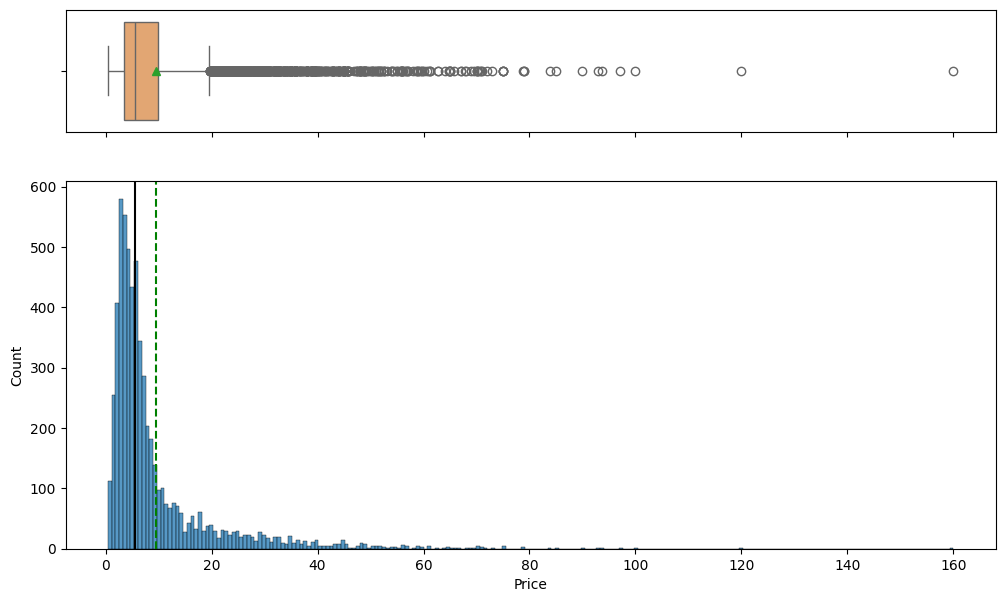

In [23]:
hist_box(df, 'Price')

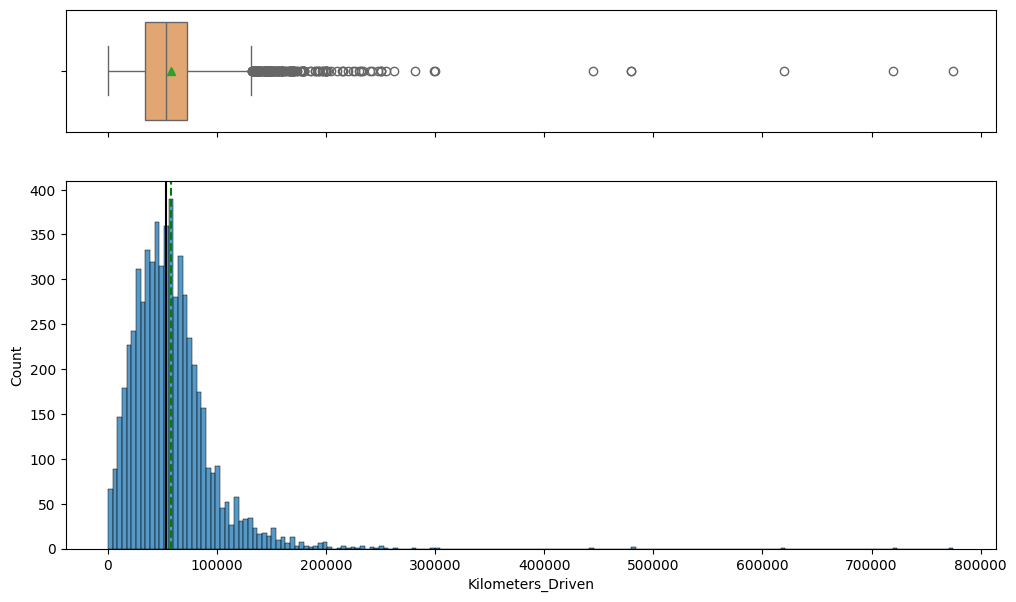

In [24]:
hist_box(df, 'Kilometers_Driven')

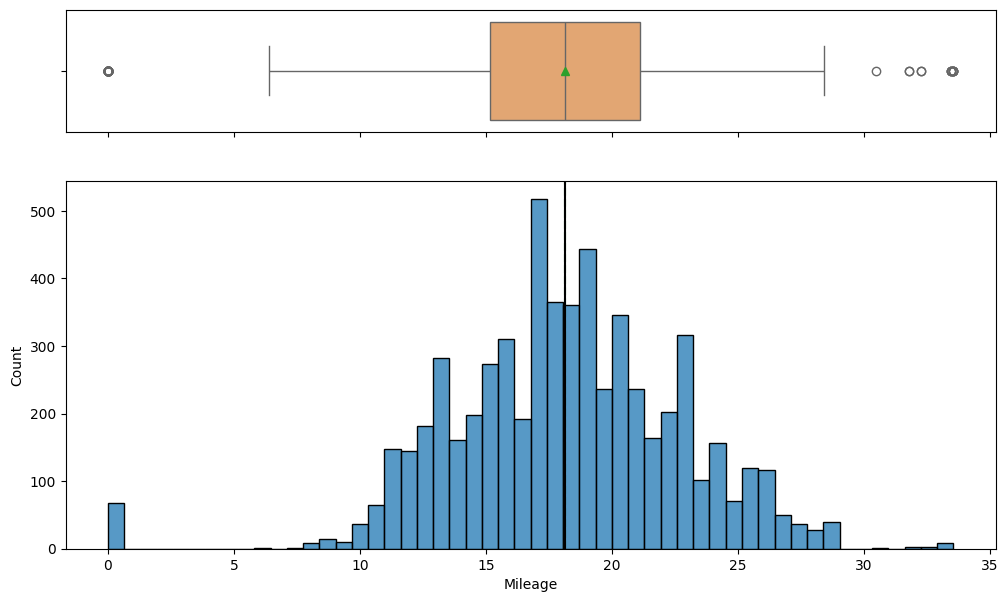

In [25]:
hist_box(df, 'Mileage')

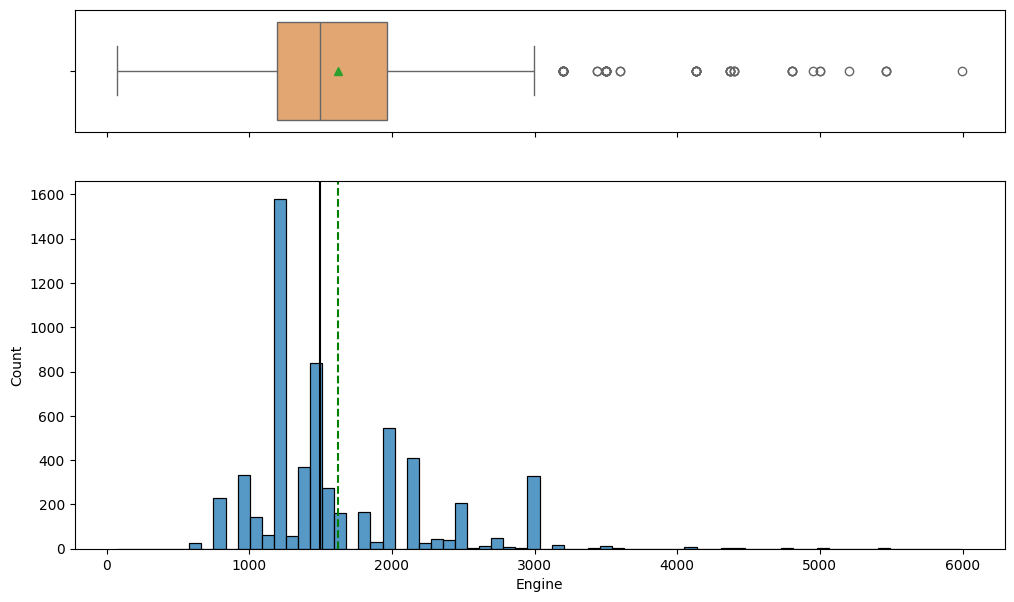

In [26]:
hist_box(df, 'Engine')

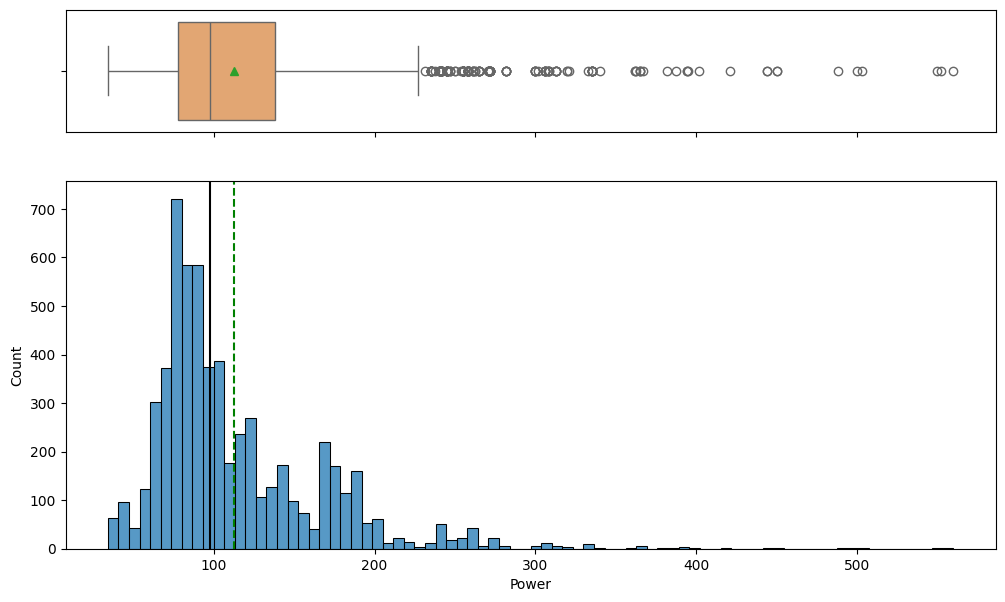

In [27]:
hist_box(df, 'Power')

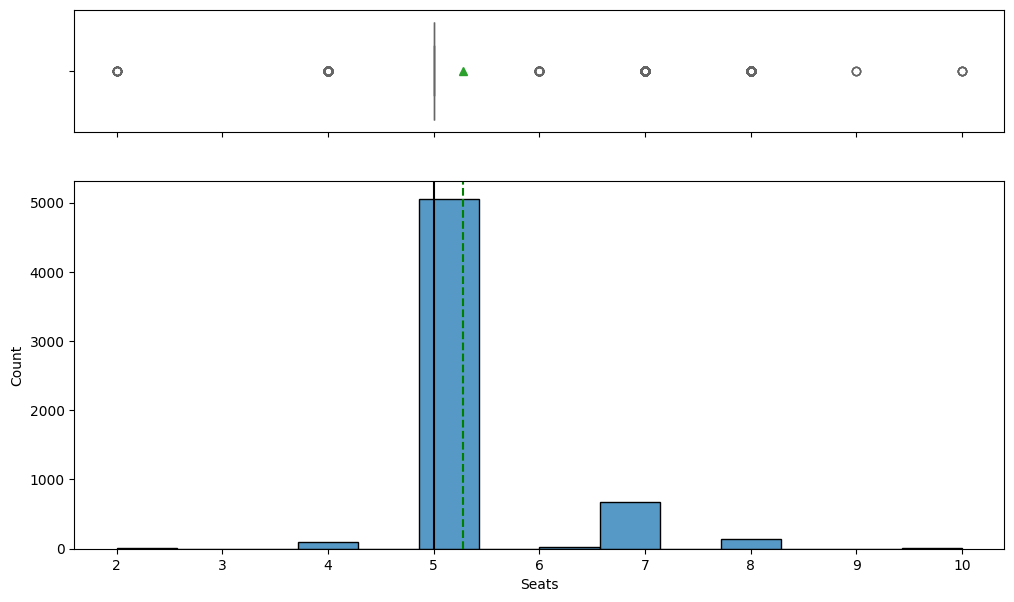

In [28]:
hist_box(df, 'Seats')

In [29]:
def labeled_bar(df, feature, perc = False, n = None):
  """
  Barplot with percentage at the top

  df = DataFrame
  feature = dataframe column
  perc = whether to display percentages instead of count (default is count)
  n = displays the top n category levels (default is none, displays all levels)
  """

  total = len(df[feature])
  count = df[feature].nunique()
  if n is None:
    plt.figure(figsize = (count + 1, 5)) #figsize adjusted depending on count vs perc
  else:
    plt.figure(figsize = (n + 1, 5))

  plt.xticks(rotation = 90, fontsize = 15)
  ax = sns.countplot(
      data = df,
      x = feature,
      palette = 'Paired',
      order = df[feature].value_counts().index[:n].sort_values(),
  )
  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(
          100 * p.get_height()/total
          )                     # Percentage of each class in the category
    else:
      label = p.get_height()

    x = p.get_x() + p.get_width()/2
    y = p.get_height()

    ax.annotate(
        label,
        (x,y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0,5),
        textcoords = 'offset points'
    ) #annotate the percentage or count
  plt.show()

<ipython-input-29-91245e16b0be>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


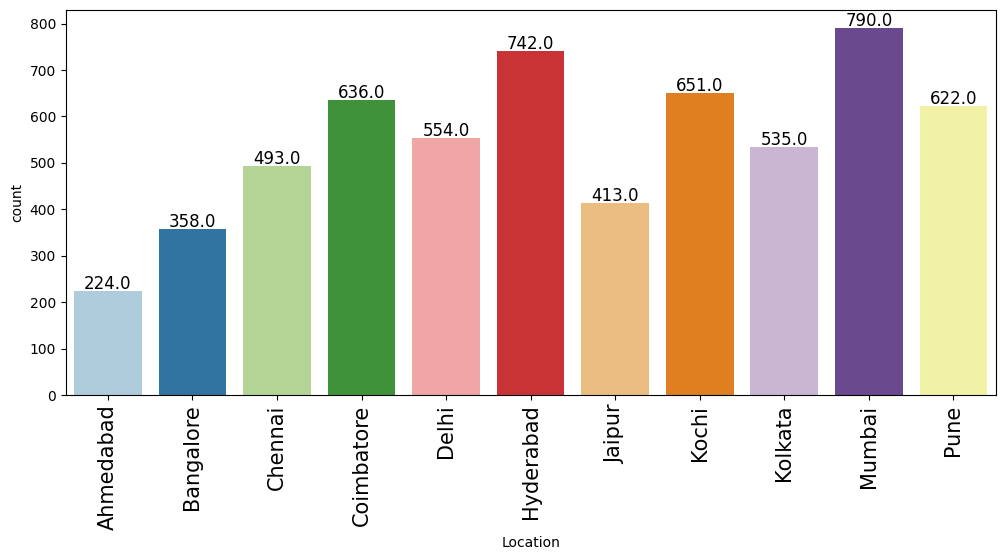

In [30]:
labeled_bar(df, 'Location')

<ipython-input-29-91245e16b0be>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


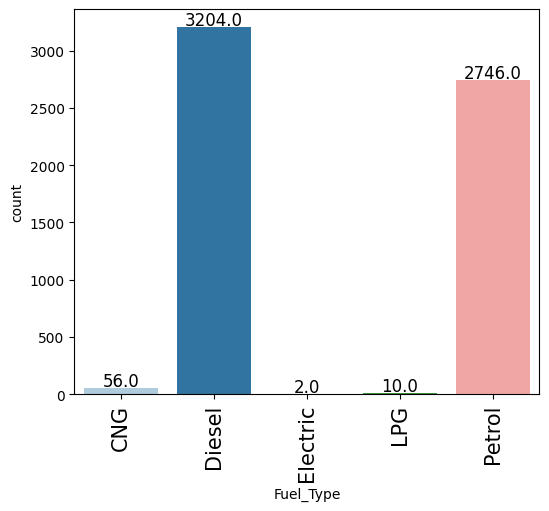

In [31]:
labeled_bar(df, 'Fuel_Type')

<ipython-input-29-91245e16b0be>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


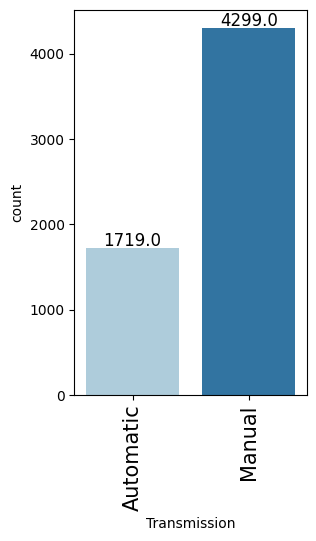

In [32]:
labeled_bar(df, 'Transmission')

<ipython-input-29-91245e16b0be>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


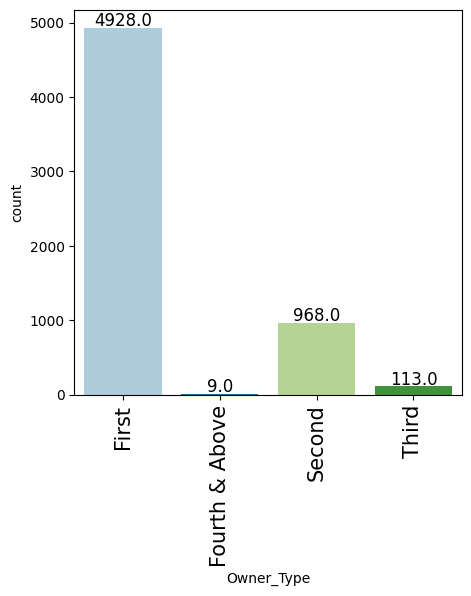

In [33]:
labeled_bar(df, 'Owner_Type')

<ipython-input-29-91245e16b0be>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


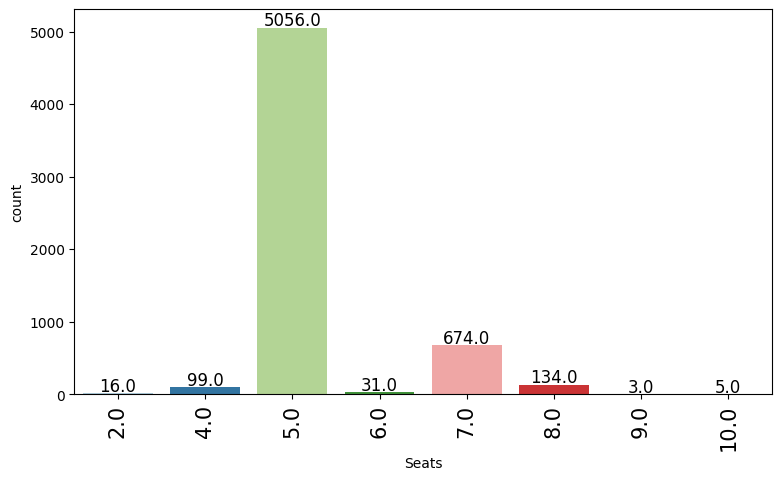

In [34]:
labeled_bar(df, 'Seats')

<ipython-input-29-91245e16b0be>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


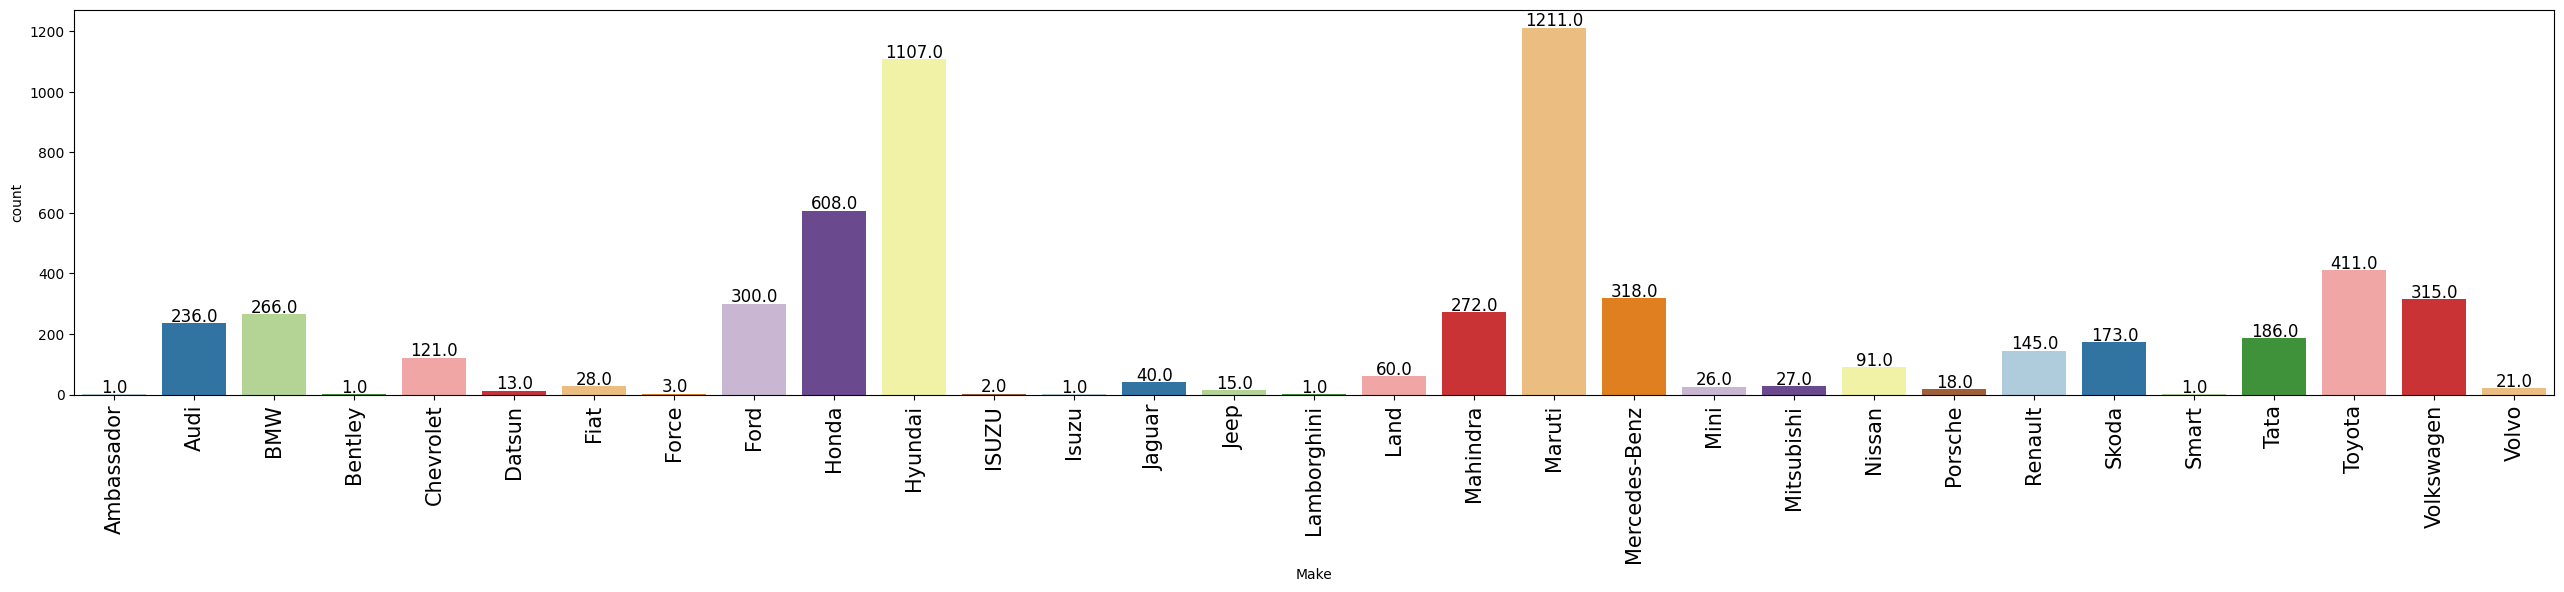

In [35]:
labeled_bar(df, 'Make')

### Feature Engineering Pt 2

Looking at Fuel Type, we will create an 'Other' category.

In [36]:
#Partition Fuel_Type into Petrol, Diesel, Other
df['Fuel_Type'] = df['Fuel_Type'].apply(lambda x: 'Petrol' if x == 'Petrol' else ('Diesel' if x == 'Diesel' else 'Other'))


In [37]:
df['Fuel_Type'].unique()

array(['Other', 'Diesel', 'Petrol'], dtype=object)

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

In [38]:
#create a list of numerical columns
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']



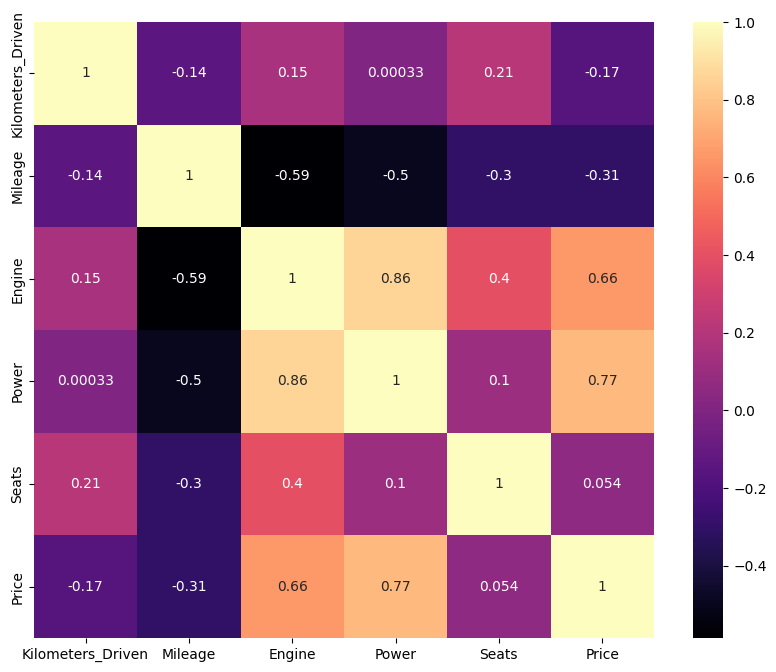

In [39]:
#correlation heatmap of numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='magma')
plt.show()

<Axes: xlabel='Power', ylabel='Price'>

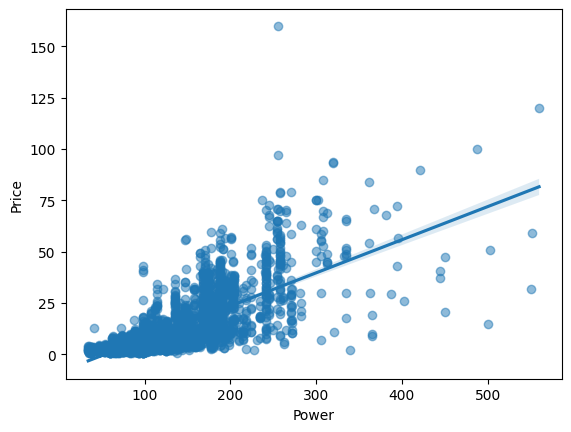

In [40]:
sns.regplot(data=df, x='Power', y='Price', scatter_kws = {'alpha' :.5})

#### Normalizing Target


In [41]:
#Create new normalized target feature 'Price_log'
df['price_log'] = np.log(df['Price'])

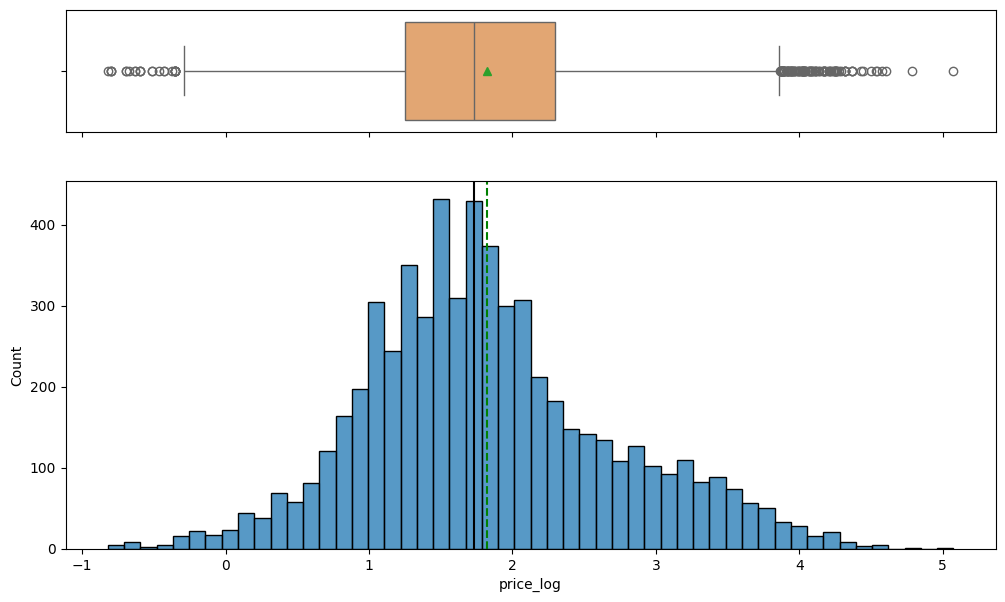

In [42]:
hist_box(df, 'price_log')

In [43]:
df.drop('Price', axis=1, inplace=True)

We now have a normalized target feature.

## **Important Insights from EDA and Data Preprocessing**


* Price is most highly correlated with engine size and power, surprisingly not with seats. Mileage and Kilometers driven have slight negative correlations.


## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

In [44]:
#Use pd.get_dummies to encode categorical features into numeric

df = pd.get_dummies(df, drop_first=True, dtype = int)

In [66]:
df.head(10)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,0.559616,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,2.525729,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,1.504077,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,1.791759,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,2.875822,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2012,75000,21.10,814.0,55.20,5.0,0.854415,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2013,86999,23.08,1461.0,63.10,5.0,1.252763,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,2016,36000,11.36,2755.0,171.50,8.0,2.862201,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,2013,64430,20.54,1598.0,103.60,5.0,1.648659,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,2012,65932,22.30,1248.0,74.00,5.0,0.667829,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [67]:
#Create X, y
X = df.drop('price_log', axis=1)
y = df['price_log']

In [70]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
#Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#Creating MinMaxScaler instance
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [74]:
#Converting the array back into a pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head(10)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,0.857143,0.100447,0.745379,0.223422,0.066204,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.619048,0.074635,0.493441,0.319946,0.201217,0.375,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.857143,0.039143,0.792785,0.198448,0.075694,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.123678,0.368217,0.355552,0.292012,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.238095,0.161105,0.563506,0.156261,0.062571,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.523810,0.102747,0.506857,0.240466,0.159376,0.375,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.904762,0.034627,0.616577,0.324502,0.296310,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.666667,0.096575,0.682767,0.198448,0.075694,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.666667,0.074806,0.682767,0.198448,0.075694,0.375,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.714286,0.090122,0.703339,0.218022,0.120768,0.375,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
#Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
#Showing the VIF for all columns of X_train
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train_scaled.columns
VIF_df['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
VIF_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Features,VIF
0,Year,2.001027
1,Kilometers_Driven,1.611057
2,Mileage,3.099337
3,Engine,10.126575
4,Power,8.969368
5,Seats,2.590955
6,Location_Bangalore,2.504226
7,Location_Chennai,3.094266
8,Location_Coimbatore,3.651228
9,Location_Delhi,3.274894


The highest VIF in our numerical columns is Engine, at 10.1. We will remove it as Engine and horsepower are so closely correlated.

In [77]:
#Remove Engine from X_train_scaled
X_train_scaled.drop('Engine', axis=1, inplace=True)

In [78]:
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train_scaled.columns
VIF_df['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
VIF_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Features,VIF
0,Year,1.992288
1,Kilometers_Driven,1.609147
2,Mileage,2.865116
3,Power,3.780928
4,Seats,2.398407
5,Location_Bangalore,2.504196
6,Location_Chennai,3.094257
7,Location_Coimbatore,3.650947
8,Location_Delhi,3.274869
9,Location_Hyderabad,3.822424


# Models

###Linear Regression

In [79]:
#Run OLS

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_scaled)


In [80]:
#Calling the Linear Regression algorithm on the train features and target variable
y_train = y_train.reset_index(drop=True)
X_train_scaled = X_train_scaled.reset_index(drop=True)

ols_v0 = sm.OLS(y_train, X_train_scaled)
ols_m0 = ols_v0.fit()
print(ols_m0.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1159.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:21:47   Log-Likelihood:                -29.406
No. Observations:                4814   AIC:                             158.8
Df Residuals:                    4764   BIC:                             482.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

### OLS Model Performance Check
Check Linear Regression Assumptions

In [82]:
def model_eval(model, X, y):

  y_hat = model.predict(X)

  rmse = np.sqrt(mean_squared_error(y, y_hat))
  mae = mean_absolute_error(y, y_hat)
  r2 = r2_score(y, y_hat)
  mape = mean_absolute_percentage_error(y, y_hat)

  return pd.DataFrame({"RMSE": [rmse], "MAE": [mae], "R2": [r2], "MAPE": [mape]})

In [83]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model_eval(model, X_train_scaled, y_train)

,RMSE,MAE,R2,MAPE
0,0.243453,0.179843,0.922617,3.005447e+12


In [84]:
#Residuals
residual = ols_m0.resid

In [85]:
residual.mean()

7.404684814342507e-15

The mean of residuals is very close to 0. The assumption is satisfied.

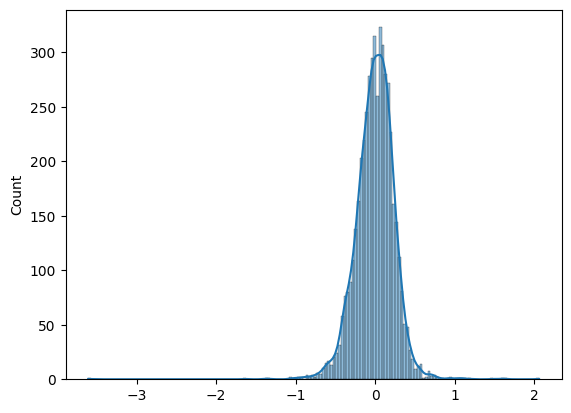

In [86]:
#Plot the histogram of residuals
sns.histplot(residual, kde=True)
plt.show()

The distribution of our error terms are normal.

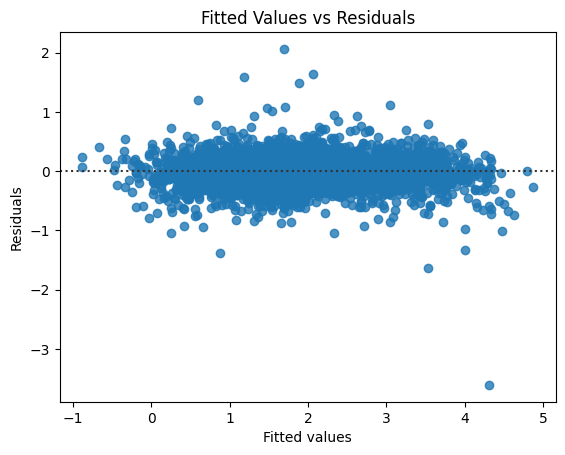

In [88]:
#Predicted values
fitted = ols_m0.fittedvalues

sns. residplot(x=fitted, y=residual)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')
plt.show()

There is no pattern.

In [89]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train_scaled)

lzip(name, test)

[('F statistic', 0.9362317036123313), ('p-value', 0.9451646365499511)]

With a p-value > .05, the residuals are homoscedastic. All assumptions are satisfied.

### Final Model


In [90]:
#Scaling the test set
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)
#Dropping Engine
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled = X_test_scaled.drop(columns=['Engine'])

#Add constant
X_test_scaled = sm.add_constant(X_test_scaled)
X_test_scaled.head()

#Align index of y_test
y_test = y_test.reset_index(drop=True)
#Create model
ols_final = sm.OLS(y_test, X_test_scaled)
ols_final_m = ols_final.fit()
print(ols_final_m.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     291.5
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:38:34   Log-Likelihood:                 1.2807
No. Observations:                1204   AIC:                             93.44
Df Residuals:                    1156   BIC:                             337.9
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Ridge Regression

In [81]:
#Importing necessary models and extras
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
#import r2, rmse, mae
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [91]:


def regression_summary(model, X, y):
    y_pred = model.predict(X)
    residuals = y - y_pred
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    n, p = X.shape

    summary = {
        "Coefficients": model.coef_,
        "Intercept": model.intercept_,
        "MSE": mse,
        "R-squared": r2,
        "Residual Std Error": np.sqrt(mse),
        "Number of Observations": n,
        "Number of Predictors": p,
    }
    return pd.DataFrame.from_dict(summary, orient='index', columns=["Value"])




In [94]:

# Define parameter grid
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [102]:
#CV of ridge

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train_sm, y_train)

#Display results
print("Best Ridge alpha:", ridge_cv.best_params_['alpha'])
print("Best Ridge R2:", ridge_cv.best_score_)


Best Ridge alpha: 1
Best Ridge R2: 0.9182529654360035


In [103]:
#Ridge regression with alpha = 1
ridge = Ridge(alpha=1)
ridge.fit(X_train_sm, y_train)

Ridge(alpha=1)

In [104]:
#print metrics for Ridge
print('R^2:', ridge.score(X_test_scaled, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled))))
print('MAE:', mean_absolute_error(y_test, ridge.predict(X_test_scaled)))

R^2: 0.9137267490527301
RMSE: 0.2545108854520221
MAE: 0.19212850293950748


Our Ridge regression also has a high prediction score of .913.

### Lasso Regression

In [105]:
# Lasso Regression with GridSearchCV
lasso = Lasso(max_iter=10000)  # Increase max_iter for convergence
lasso_cv = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train_sm, y_train)

# Display results
print("Best Lasso alpha:", lasso_cv.best_params_['alpha'])
print("Best Lasso R2:", lasso_cv.best_score_)

Best Lasso alpha: 0.01
Best Lasso R2: 0.8543949597257937


Our best Lasso score score is less than our Ridge and OLS, so we will stop here and move on to a decision tree.

### Decision Tree

In [110]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
# Building decision tree model
dt = DecisionTreeRegressor(random_state = 1)

In [111]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [112]:
#Print decision tree metrics
print('R^2:', dt.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dt.predict(X_test))))
print('MAE:', mean_absolute_error(y_test, dt.predict(X_test)))

R^2: 0.8776442775029798
RMSE: 0.30309615223002156
MAE: 0.19842740862465957


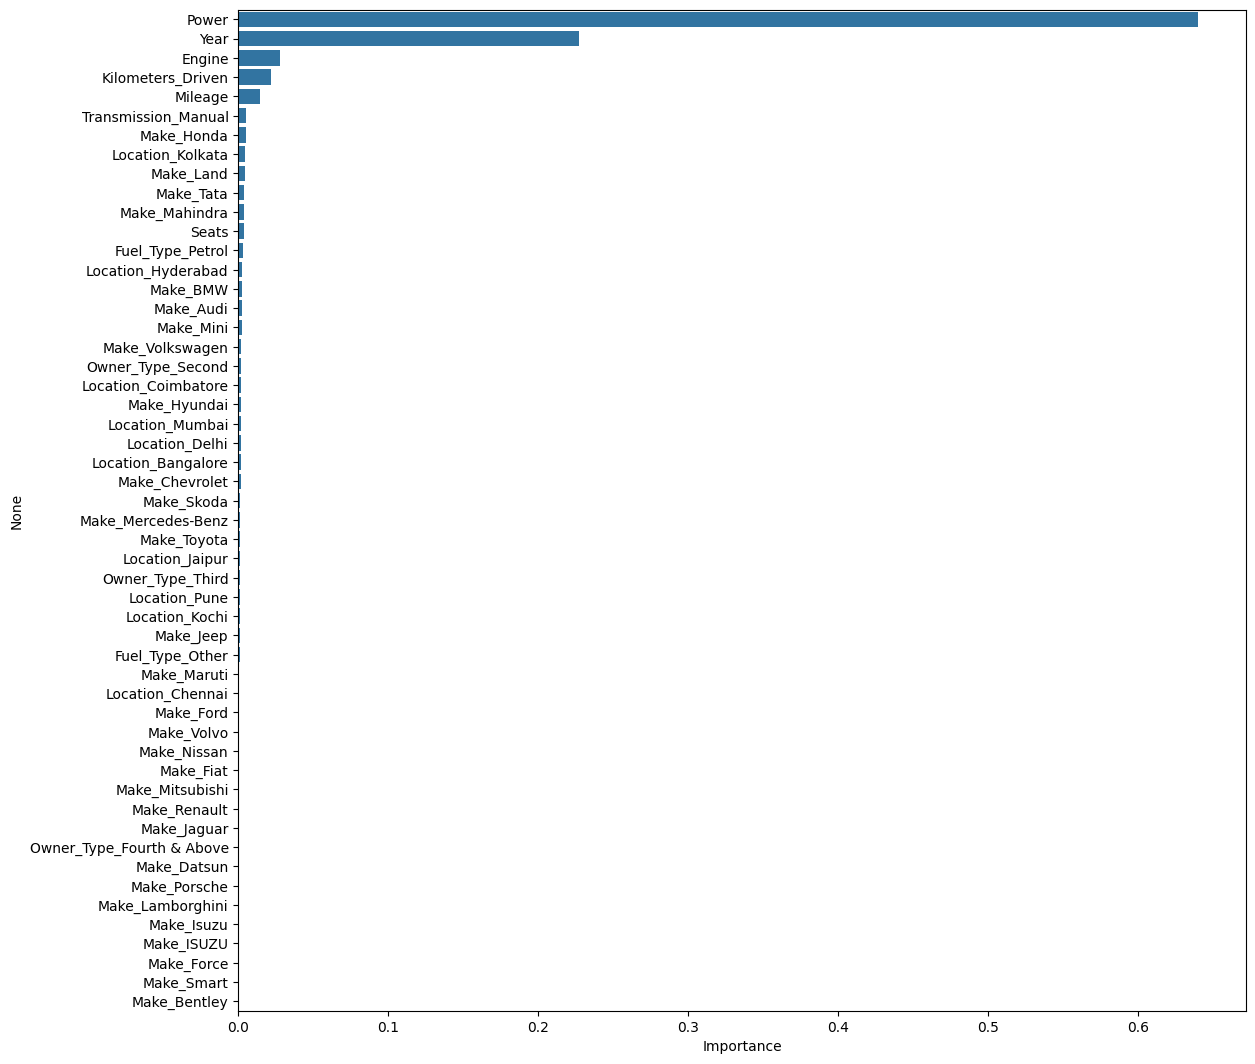

In [126]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X_test.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

The model is showing power and year as the most important features. The model is still not performing as well as our other models. We will try tuning hyperparameters.

### **Hyperparameter Tuning: Decision Tree**

In [121]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [122]:
from sklearn import metrics
#Choose type of regressor
dtree_estimator = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the regressor to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=1)

In [123]:
#Print upated decision tree metrics
print('R^2:', dtree_estimator.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_estimator.predict(X_test))))
print('MAE:', mean_absolute_error(y_test, dtree_estimator.predict(X_test)))

R^2: 0.6476497634183553
RMSE: 0.514346233494202
MAE: 0.3963422470520276


**Feature Importance**

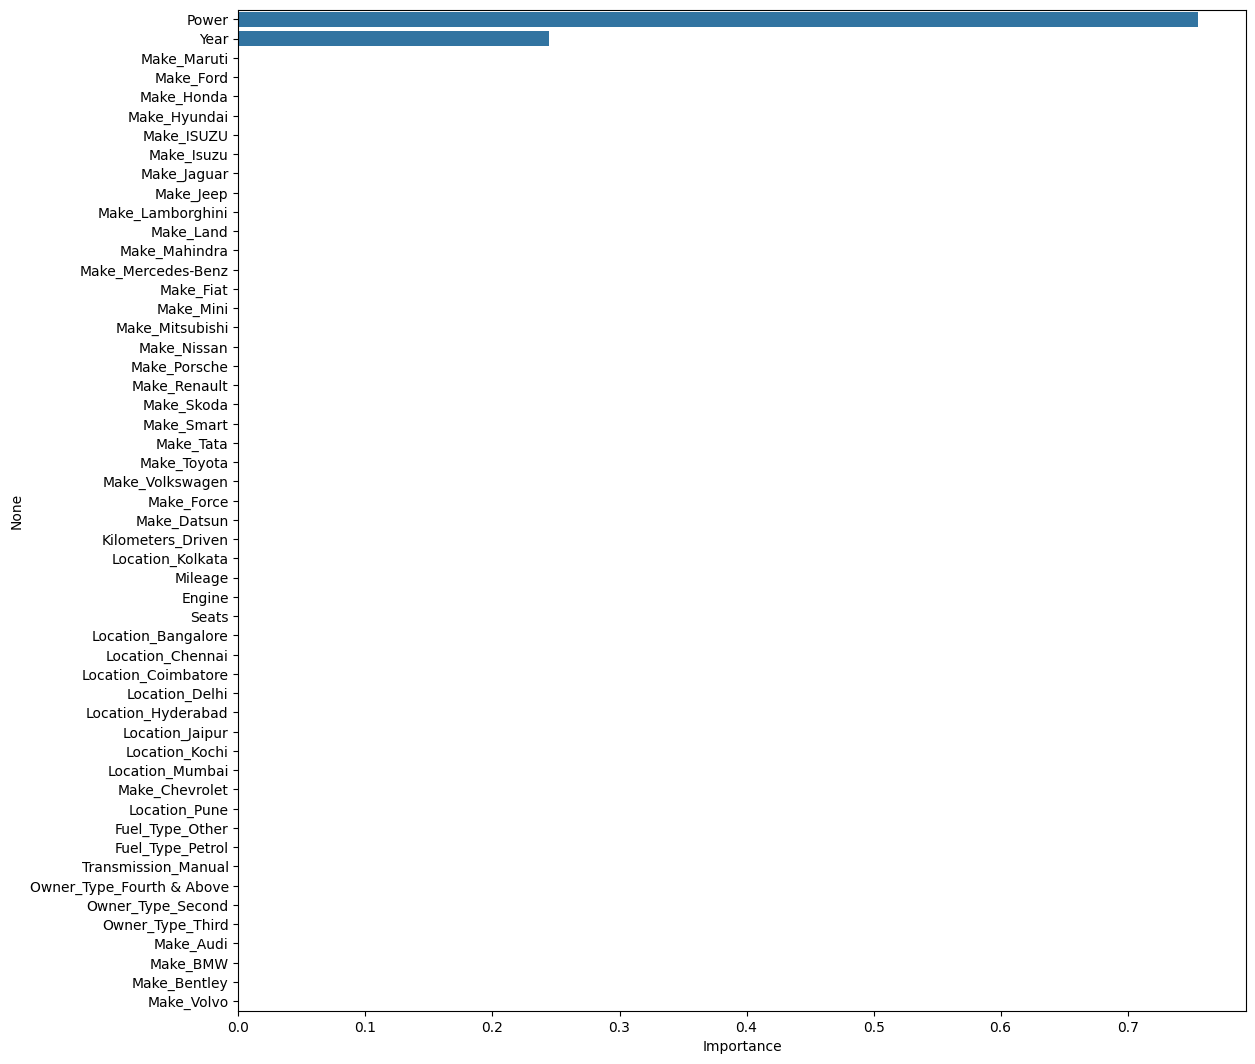

In [124]:
# Plot the feature importance

importances = dtree_estimator.feature_importances_

columns = X_test.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

### Observations


*   Our tuned model is not performing as well in comparison with our model with default parameters. This model was already performing worse than our linear models.
*   After tuning our model is showing only 2 important features, meaning it has probably oversimplified the problem.




## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- We tested 4 models, Ordinary Least Squares, Ridge, Lasso, and Decision Tree.
- OLS performed highest with an adjusted R^2 score of .92, meaning 92% of variance in the model was described by the data.
- Ridge regression performed similarly, however we recommend using OLS as it is more easily interpreted.
- Lasso and Decision Trees performed significantly worse. There is room for more tuning of these models' hyperparameters, however given the strong prediction of OLS there doesn't seem to be a reason to at this time.

**2. Refined insights:**
- The two most important features to keep track of when determining price of used cars are Power and Year.
- The feature that most strongly lowers price is kilometers driven and mileage. These bring the price down, however they are not nearly as strongly waited as the first two features.

**3. Proposal for the final solution design:**
- We recommend using the OLS model, as it is both highly predictive and interpretable. It can both be used to directly predict prices, as well as help employees develop an intuition of approximately how much a car should be worth.